In [21]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

In [22]:
# Opening the FITS file, suppressing warnings, and ignoring verification. 
hdul = fits.open("image.fits", verify='ignore')
data = hdul[0].data
# Casting to float64 to ensure byte order is native.
data = data.astype(np.float64)
hdul.close()

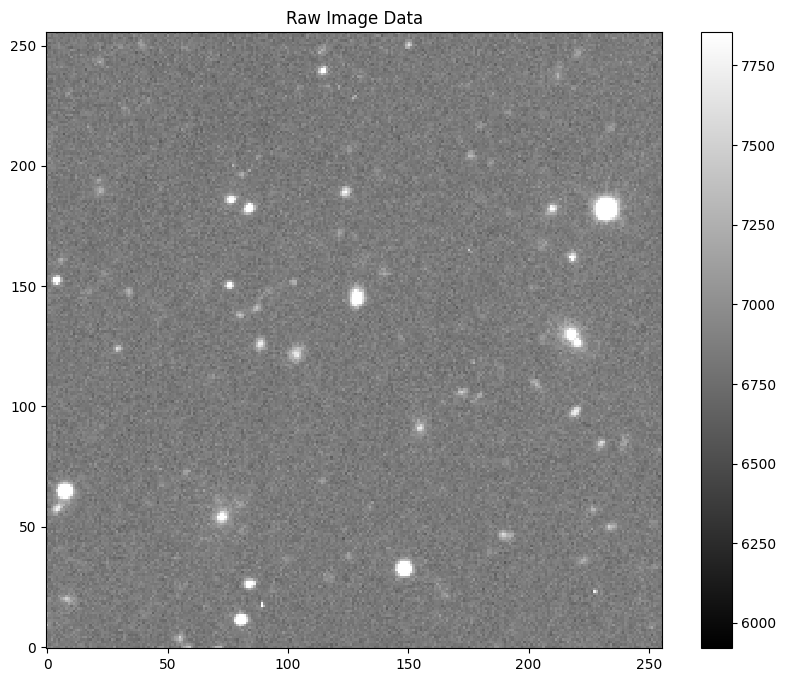

In [23]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title("Raw Image Data")
plt.savefig("raw_image.png")
plt.show()

Global background: 6852.04931640625
Global RMS (noise): 65.46174621582031


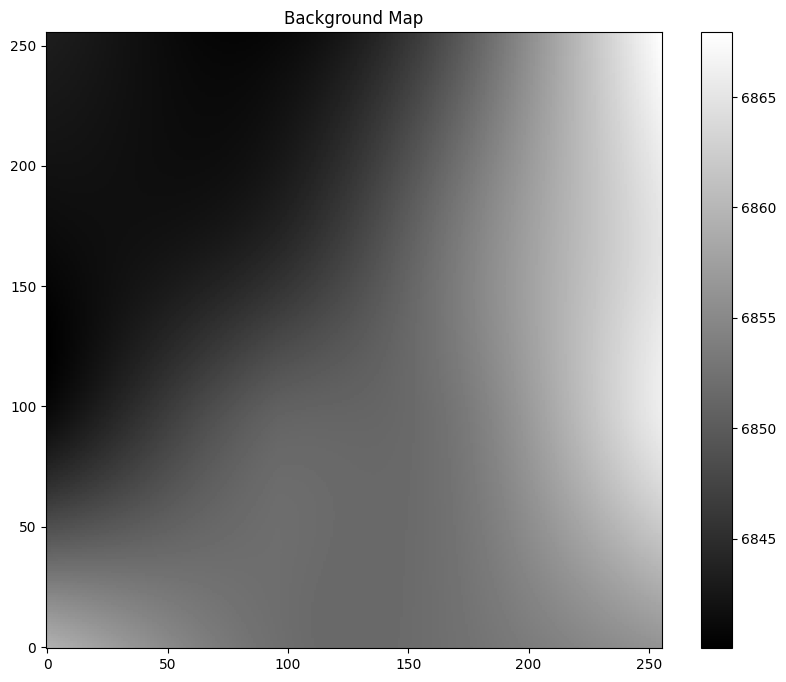

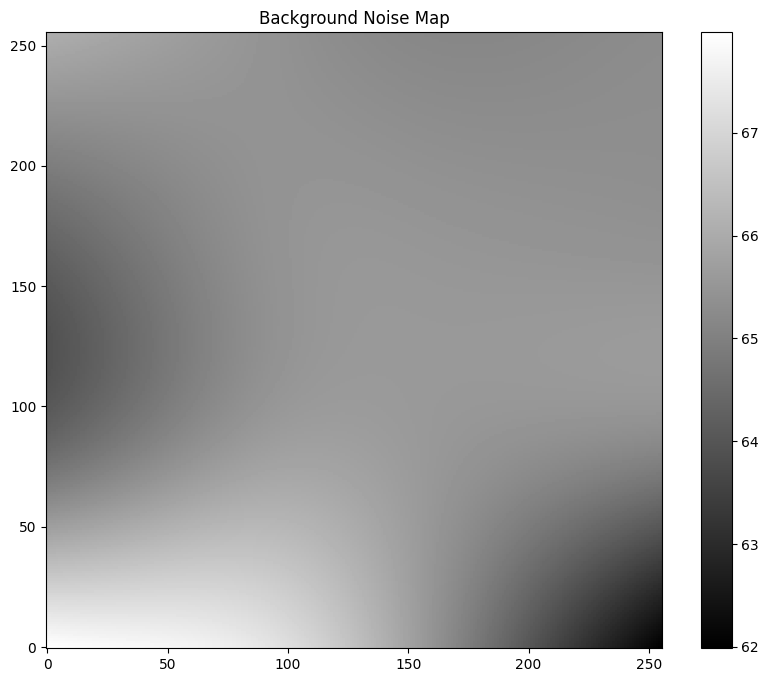

In [24]:
# Measuring background on the image.
bkg = sep.Background(data)

print("Global background:", bkg.globalback)
print("Global RMS (noise):", bkg.globalrms)

# Evaluate background as a 2D array, same size as the original image.
bkg_image = bkg.back()

# Show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Map")
plt.savefig("background_map.png")
plt.show()

# Evaluate the background noise as a 2D array, same size as the original image.
bkg_rms = bkg.rms()

# Show the background noise.
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Noise Map")
plt.savefig("background_noise.png")
plt.show()

# Subtract the background.
data_sub = data - bkg

In [25]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# How many objects were detected?
print(f"Detected {len(objects)} objects")

Detected 69 objects


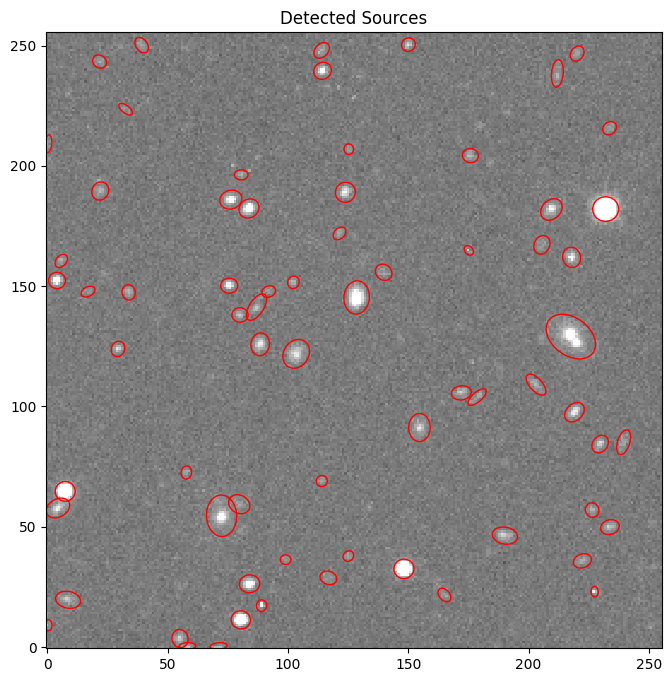

In [26]:
from matplotlib.patches import Ellipse

# Plot the background-subtracted image.
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)

im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# Plot an ellipse for each object.
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title("Detected Sources")
plt.savefig("detected_sources.png")
plt.show()

In [27]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

# Showing the result for the 10 objects.
for i in range(10):
    print(f"object {i}: flux = {flux[i]:.6f} +/- {fluxerr[i]:.6f}")

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
